# Fourier Decomposition in Python Using SciPy

From <a href ="https://www.oreilly.com/library/view/elegant-scipy/9781491922927/ch04.html">here</a>.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

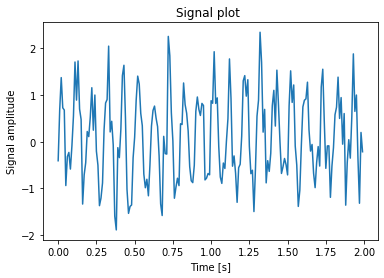

In [2]:
f = 10  # Frequency, in cycles per second, or Hertz
f_s = 100  # Sampling rate, or number of measurements per second

t = np.linspace(0, 2, 2 * f_s, endpoint=False)
signal_vals = np.sin(f * 2 * np.pi * t) + np.random.normal(0,0.5, (2 * f_s))

fig, ax = plt.subplots()
ax.plot(t, signal_vals )
plt.title("Signal plot ")
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal amplitude');

/home/admin/Desktop/virtual_environments/standard_env/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':


(-5, 110)

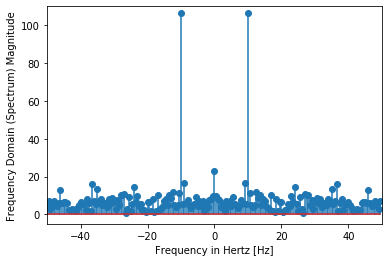

In [3]:
from scipy import fftpack

f_s = 100 # Sampling rate

# signal_values = # set signal vals

signal_vals_fft = fftpack.fft(signal_vals)
freqs = fftpack.fftfreq(len(signal_vals)) * f_s

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(signal_vals_fft))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-f_s / 2, f_s / 2)
ax.set_ylim(-5, 110)

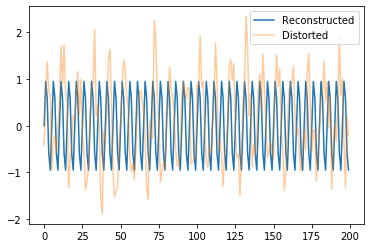

In [5]:
power = np.abs(signal_vals_fft)
freq_max_power = np.argmax(power)

angular_freq = 2*np.pi*freq_max_power

reconstructed_wave = np.sin(angular_freq * t)
plt.plot(reconstructed_wave, label = "Reconstructed")
plt.plot(signal_vals, alpha = 0.4, label = "Distorted")
plt.legend()
plt.show()